In [94]:
import pandas as pd
import numpy as np
import re

In [95]:
df_watcha = pd.read_csv('/content/drive/MyDrive/contents_english.csv')
df_watcha

,Unnamed: 0,reviews,title
0,0,How criminal profiling came to be in South Kor...,악의마음을읽는자들
1,1,G r i p p i n g All the cases are based on tru...,악의마음을읽는자들
2,2,Darkness cannot drive out darkness only light ...,악의마음을읽는자들
3,3,Brilliant in every aspect There is no such thi...,악의마음을읽는자들
4,4,A Wonderfully Grim and Enthralling Show Throug...,악의마음을읽는자들
...,...,...,...
259793,259793,Unique plot with Great love story Loved it to ...,보쌈-운명을훔치다
259794,259794,It started out really well and the acting was ...,보쌈-운명을훔치다
259795,259795,I feel so excited every Saturdays and Sundays ...,보쌈-운명을훔치다
259796,259796,Loved it to the end,보쌈-운명을훔치다


In [96]:
df_watcha.drop(['Unnamed: 0'],inplace=True, axis=1)

In [97]:
titles = df_watcha['title']

In [98]:
len(df_watcha)

259798

In [99]:
sentences = []

for i in df_watcha['reviews']:
    text = re.sub('[^a-zA-Z\']',' ',i).strip()
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`…》]','', text)
    # text = re.sub(' +', ' ', text)
    text = ' '.join(text.split())
    sentences.append(text)
len(sentences)

259798

In [100]:
eng_frame = pd.DataFrame(sentences, columns = ['reviews'])
eng_frame

,reviews
0,How criminal profiling came to be in South Kor...
1,G r i p p i n g All the cases are based on tru...
2,Darkness cannot drive out darkness only light ...
3,Brilliant in every aspect There is no such thi...
4,A Wonderfully Grim and Enthralling Show Throug...
...,...
259793,Unique plot with Great love story Loved it to ...
259794,It started out really well and the acting was ...
259795,I feel so excited every Saturdays and Sundays ...
259796,Loved it to the end


In [101]:
samples = pd.Series(eng_frame['reviews'])

In [102]:
df_length = samples.apply(len)
eng_frame['lens'] = df_length

In [103]:
len(eng_frame)

259798

In [104]:
print('리뷰 길이 최대값 : {}'.format(np.max(eng_frame['lens'])))
print('리뷰 길이 최소값 : {}'.format(np.min(eng_frame['lens'])))
print('리뷰 길이 평균값 : {:.2f}'.format(np.mean(eng_frame['lens'])))
print('리뷰 길이 표준편차 : {:.2f}'.format(np.std(eng_frame['lens'])))
print('리뷰 길이 중간값 : {}'.format(np.median(eng_frame['lens'])))
print('리뷰 길이 제1사분위 : {}'.format(np.percentile(eng_frame['lens'], 25)))
print('리뷰 길이 제3사분위 : {}'.format(np.percentile(eng_frame['lens'], 75)))

리뷰 길이 최대값 : 19356
리뷰 길이 최소값 : 2
리뷰 길이 평균값 : 261.19
리뷰 길이 표준편차 : 516.52
리뷰 길이 중간값 : 116.0
리뷰 길이 제1사분위 : 55.0
리뷰 길이 제3사분위 : 256.0


Text(0, 0.5, 'count')

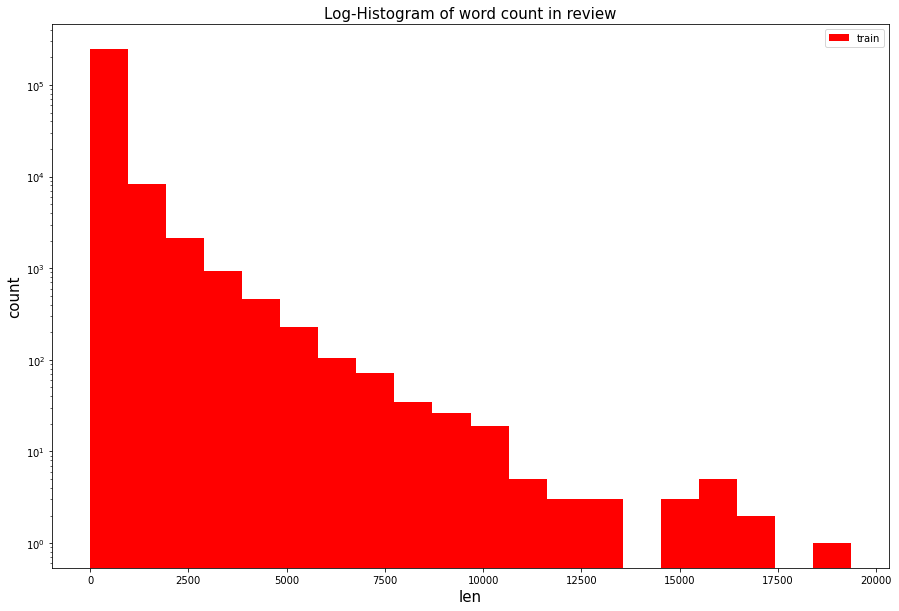

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.hist(eng_frame['lens'], bins=20, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('len', fontsize = 15)
plt.ylabel('count', fontsize=15)

In [106]:
length = np.percentile(df_length, 25)

In [107]:
eng_reviews= []
for index, i in enumerate(df_length):
    if i > length and i < 13000:
        eng_reviews.append(eng_frame.reviews[index])
    else:
        eng_reviews.append('빈값')

In [108]:
df_eng = pd.DataFrame(eng_reviews, columns = ['reviews'])

In [109]:
df_eng['title'] = titles

In [110]:
df_eng

,reviews,title
0,How criminal profiling came to be in South Kor...,악의마음을읽는자들
1,G r i p p i n g All the cases are based on tru...,악의마음을읽는자들
2,Darkness cannot drive out darkness only light ...,악의마음을읽는자들
3,Brilliant in every aspect There is no such thi...,악의마음을읽는자들
4,A Wonderfully Grim and Enthralling Show Throug...,악의마음을읽는자들
...,...,...
259793,빈값,보쌈-운명을훔치다
259794,It started out really well and the acting was ...,보쌈-운명을훔치다
259795,I feel so excited every Saturdays and Sundays ...,보쌈-운명을훔치다
259796,빈값,보쌈-운명을훔치다


In [111]:
drop_row = df_eng[df_eng['reviews'] == '빈값'].index

In [112]:
final_eng = df_eng.drop(drop_row)

In [113]:
final_eng

,reviews,title
0,How criminal profiling came to be in South Kor...,악의마음을읽는자들
1,G r i p p i n g All the cases are based on tru...,악의마음을읽는자들
2,Darkness cannot drive out darkness only light ...,악의마음을읽는자들
3,Brilliant in every aspect There is no such thi...,악의마음을읽는자들
4,A Wonderfully Grim and Enthralling Show Throug...,악의마음을읽는자들
...,...,...
259790,bagus bgt yuri never fails me sumpahhhh a very...,보쌈-운명을훔치다
259791,the start was so good like good but as i watch...,보쌈-운명을훔치다
259792,I really like the story Two thumbs up for Jung...,보쌈-운명을훔치다
259794,It started out really well and the acting was ...,보쌈-운명을훔치다


In [186]:
df_drama = final_eng[final_eng['title'] == '서른이지만열일곱입니다']
len(df_drama)

1029

In [ ]:
final_eng['title'].unique()

array(['악의마음을읽는자들', '라이프온마스', '옷소매붉은끝동', '이구역의미친X', '어느날우리집현관으로멸망이들어왔다',
       '소녀의세계', '모두그곳에있다', '거짓말의거짓말', '한사람만', '연애플레이리스트',
       '스물다섯스물하나', '무브투헤븐:나는유품정리사입니다', '블루버스데이',
       '호텔델루나', '이런꽃같은엔딩', '하늘에서내리는일억개의별', '엑스엑스', '기름진멜로', '악의꽃',
       '서른이지만열일곱입니다', '킹덤', '작은신의아이들', '뫼비우스:검은태양',
       '검색어를입력하세요WWW', '술꾼도시여자들', '홈타운', '한번다녀왔습니다', '서른아홉',
       '오월의청춘', '트랩', '언더커버', '산후조리원', '왓쳐', '아는와이프', '연애미수',
       '인서울-내가독립하는유일한방법', '자백', '60일지정생존자',
       '시맨틱에러', '녹두꽃', '백일의낭군님', '라이브온', '그린마더스클럽', '언프레임드', '괴물',
       '태종이방원', '사이코지만괜찮아', '런온', '추리의여왕', '365:운명을거스르는1년', '시를잊은그대에게',
       '인간수업', '으라차차와이키키', '우수무당가두심', '트레이서', '방법', '사내맞선', '며느라기', '구경이',
       '어쩌다발견한하루', '김비서가왜그럴까', '나의흑역사오답노트', '나의아저씨', '에이틴', '파친코', '땐뽀걸즈',
       '카이로스', '18어게인', 'D.P.', '로스쿨', '대박부동산', '사랑의불시착', '스토브리그',
       '단하나의사랑', '안녕나야', '그림자미녀', '도시남녀의사랑법', '본대로말하라', '좀예민해도괜찮아',
       '사당보다먼의정부보다가까운시즌3', '내뒤에